In [1]:
# STEP 1 : Importing libraries and reading the data

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

In [2]:
df = pd.read_csv('~/Downloads/uber.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
# STEP 2 : Cleaning the data

# Checking for null values
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

<AxesSubplot:>

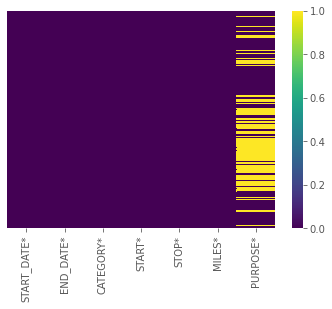

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

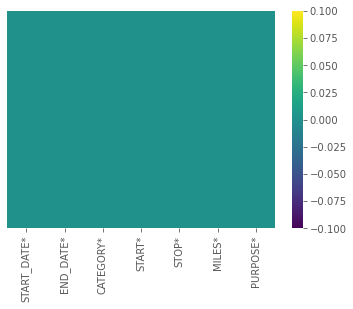

In [31]:
# Drop / Remove null values

df = df.dropna()
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [36]:
# STEP 3 : Transforming the data

# Getting hour,day,days of the week and month from the date of trip

# to_datetime() : converts string date time to python date time object

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"],format="%m/%d/%Y %H:%M")
df["END_DATE*"] = pd.to_datetime(df["END_DATE*"],format="%m/%d/%Y %H:%M")
hour = []
day = []
dayofweek = [] 
month = []
weekday = []
for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR'] = hour
df['DAY'] = day
df['DAY_OF_WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [37]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [38]:
# Finding Travelling time

time = []
df['TRAVELLING_TIME'] = df['END_DATE*'] - df['START_DATE*']
for i in df['TRAVELLING_TIME']:
    time.append(i.seconds/60)
df['TRAVELLING_TIME'] = time

In [39]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


In [40]:
# Calculating Average Speed of trip

df['TRAVELLING_TIME'] = df['TRAVELLING_TIME']/60
df['SPEED'] = df['MILES*']/df['TRAVELLING_TIME']
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

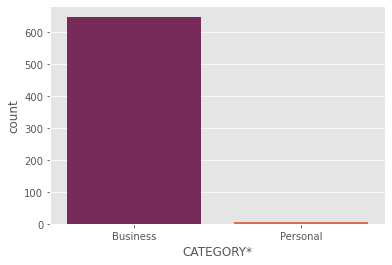

In [54]:
# STEP 4 : Visualization

sns.countplot(x = 'CATEGORY*',data = df, palette = 'rocket')

# Conclusion : most people use UBER for business purposes

<AxesSubplot:ylabel='Frequency'>

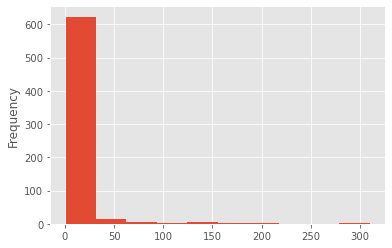

In [26]:
# Histogram for miles

df['MILES*'].plot.hist()

# Conclusion : most people do not travel long distances

<AxesSubplot:>

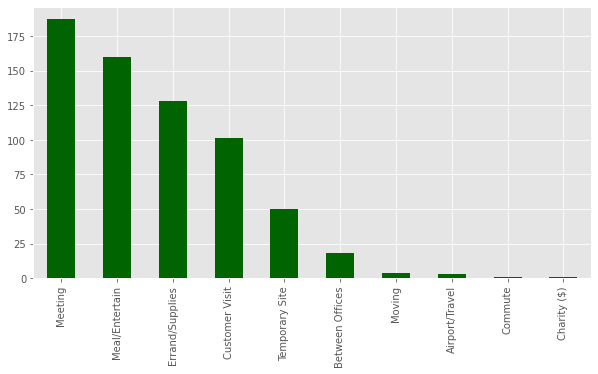

In [29]:
# Trip Purpose

df['PURPOSE*'].value_counts().plot(kind = 'bar',figsize =(10,5),color = 'darkgreen')

# Conclusion : purpose of trip mostly seems to be for meeting and meal/entertainment

<AxesSubplot:>

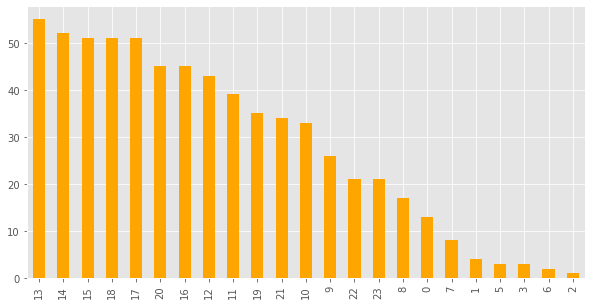

In [15]:
# Trips per hour of the day

df['HOUR'].value_counts().plot(kind='bar',figsize = (10,5),color = 'orange')

<AxesSubplot:>

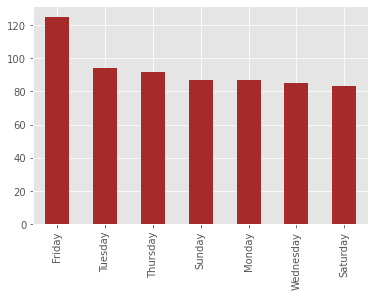

In [32]:
# Trips per day of week

df['WEEKDAY'].value_counts().plot(kind = 'bar', color = 'brown')

# Conclusion : Highest number of trips are on Friday

<AxesSubplot:>

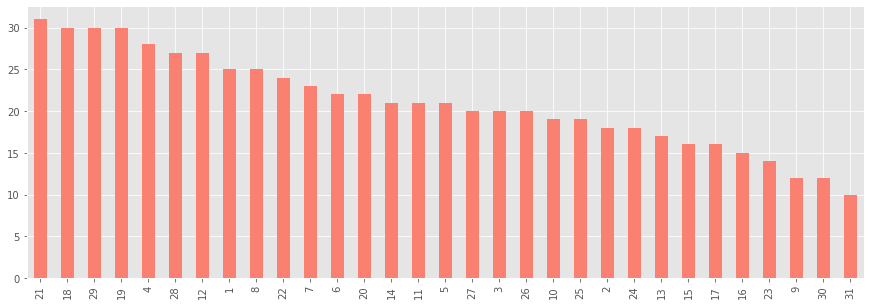

In [16]:
# Trips per day of the month

df['DAY'].value_counts().plot(kind = 'bar', figsize = (15,5), color = "salmon")

<AxesSubplot:>

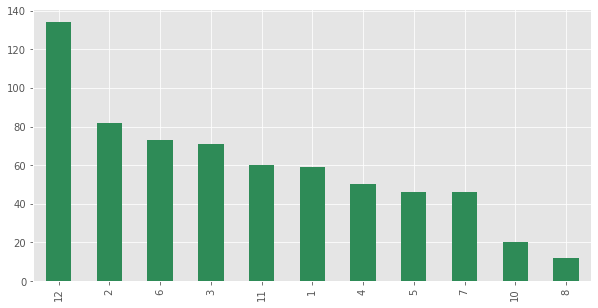

In [17]:
# Trips in a month

df['MONTH'].value_counts().plot(kind = 'bar', figsize = (10,5), color = "seagreen")

<AxesSubplot:>

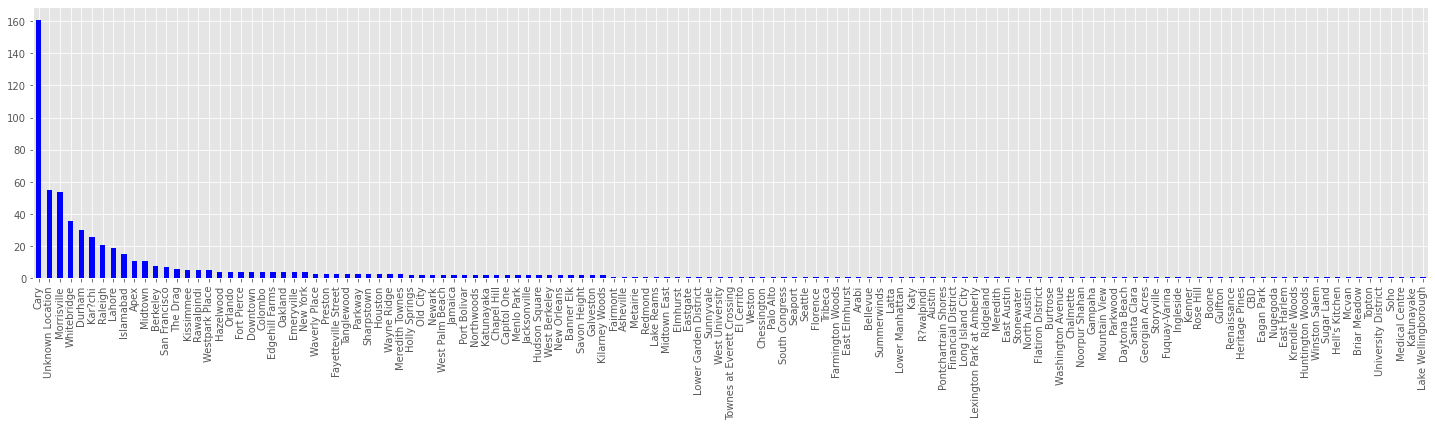

In [35]:
# Starting points of trip

df['START*'].value_counts().plot(kind = 'bar',figsize = (25,5),color = 'blue')

# Conclusion : Highest number of people who take trips are from Cary

<AxesSubplot:xlabel='PURPOSE*'>

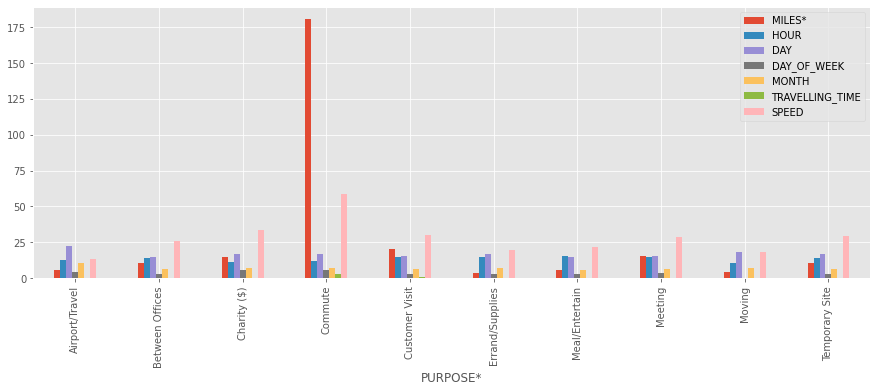

In [18]:
# Comparing all the purpose with the miles, hour, day of the month, day of the week, month, travelling time

df.groupby('PURPOSE*').mean().plot(kind = 'bar', figsize = (15,5))

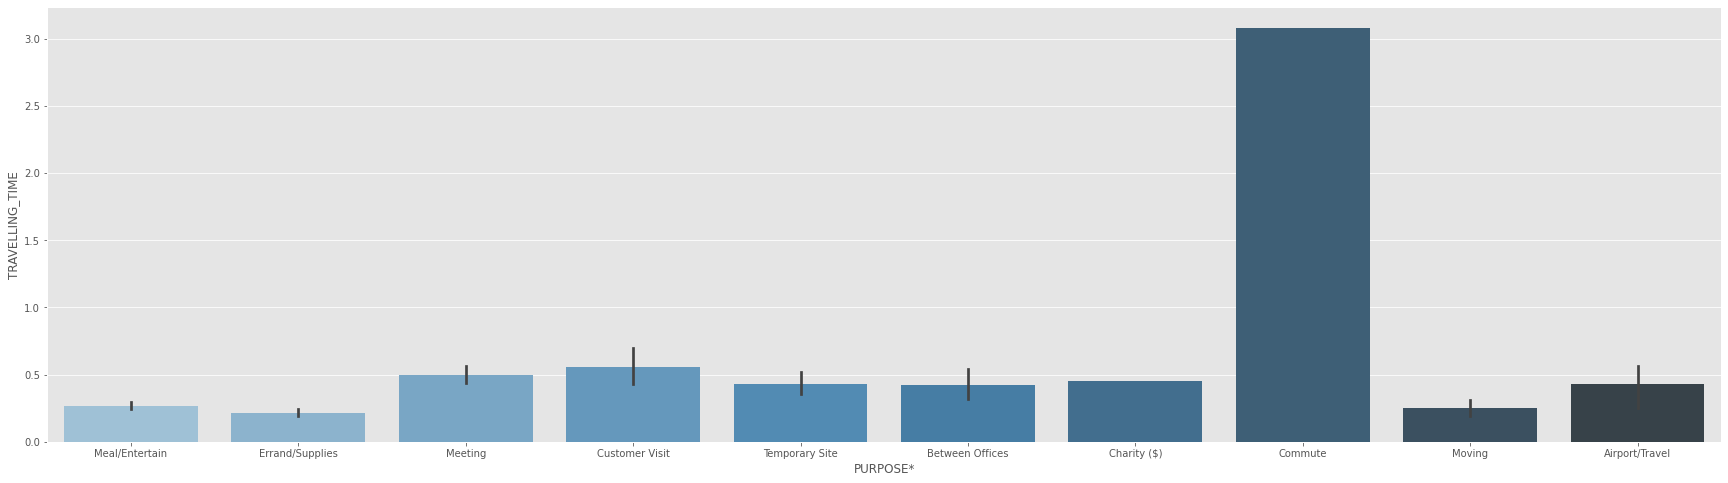

In [49]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.barplot(x= 'PURPOSE*', y='TRAVELLING_TIME', data=df ,palette="Blues_d")
plt.show()